# Differential steering including robot's width and wheels radius

This example shows the movement of a differential robotics platform on an empty space following specific robot's wheel speeds.

The model receive the speed of each side of the platform:

$$
v_l(t)
$$

$$
v_r(t)
$$

and return the position and direction of the robot:

$$
X(t) = \left[ x(t), \ y(t), \ \theta(t) \right]
$$

In [ ]:
import roboticstoolbox as rtb
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Installing the modules
# Python robotics toolbox require numpy 1.2x
!pip install matplotlib numpy==1.26.4 roboticstoolbox-python

This example includes robot's parameters as width and wheels radius:

$$
W, \phantom{    } wr
$$

In [ ]:
robot_width = 0.12
wheel_radius = 0.042

Create the robot at $ \ x=0$, $ \ y=0$, $ \ \theta=\pi/2 \ $ (90°)

In [ ]:
robot = rtb.DiffSteer(W=robot_width, x0=(0, 0, np.pi/2))
robot

DiffSteer: x = [ 0, 0, 1.57 ]
  W=0.12, steer_max=inf, vel_max=inf, accel_max=inf

define the wheel speed vectors $\omega_1$ and $\omega_2$, then obtain $v_l$ and $v_r$ through the wheel radius $wr$:

$$
v_l = \omega_1 \cdot wr
$$

$$
v_r = \omega_2 \cdot wr
$$


In [ ]:
ω1 = np.array([2, 4, 2, -6])
ω2 = np.array([2, -4, 2, 4])

vl = ω1*wheel_radius
vr = ω2*wheel_radius

In [ ]:
times = 5

for _ in range(times):
    for vl_i, vr_i in zip(vl, vr):
        robot.step((vl_i, vr_i))
        
print(robot.x_hist)

[[5.14351656e-19 8.40000000e-03 1.57079633e+00]
 [5.14351656e-19 8.40000000e-03 1.29079633e+00]
 [2.32138745e-03 1.64728657e-02 1.29079633e+00]
 [4.64277490e-03 2.45457314e-02 1.29079633e+00]
 [4.64277490e-03 2.45457314e-02 1.01079633e+00]
 [9.10473896e-03 3.16626743e-02 1.01079633e+00]
 [1.35667030e-02 3.87796172e-02 1.01079633e+00]
 [1.35667030e-02 3.87796172e-02 7.30796327e-01]
 [1.98217052e-02 4.43863050e-02 7.30796327e-01]
 [2.60767074e-02 4.99929927e-02 7.30796327e-01]
 [2.60767074e-02 4.99929927e-02 4.50796327e-01]
 [3.36375512e-02 5.36527253e-02 4.50796327e-01]
 [4.11983949e-02 5.73124578e-02 4.50796327e-01]
 [4.11983949e-02 5.73124578e-02 1.70796327e-01]
 [4.94761726e-02 5.87401818e-02 1.70796327e-01]]


(-0.0024738086298463375,
 0.051949981226773086,
 -0.002937009090029556,
 0.06167719089062067)

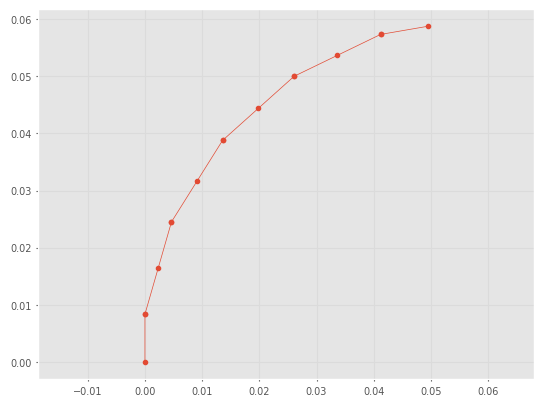

In [ ]:
x = np.insert(robot.x_hist[:,0], 0, robot.x0[0])
y = np.insert(robot.x_hist[:,1], 0, robot.x0[1])

plt.plot(x, y, marker='.')
plt.axis('equal')